In [1]:
## Importing Libraries

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection
import sklearn.preprocessing as preproc
from sklearn.feature_extraction import text
import pickle
import warnings
warnings.filterwarnings("ignore")

In [3]:
del df

NameError: ignored

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Final_Dataset_V2.xlsx to Final_Dataset_V2 (1).xlsx


In [5]:
df = pd.read_excel('Final_Dataset_V2.xlsx')

In [6]:
df.head()

,review,rating
0,Lost in Hartsfield I swear I hate ATL airport ...,1
1,Atlanta airport trash ðŸ˜«,1
2,"flight got fucking canceled, might have to spe...",1
3,"Disgusting. Took one bite, spit it out and th...",1
4,donâ€™t ever get lost in Atlanta airport the e...,1


In [7]:
# split the 'text' column on the word "(Original)" and take only the first part
df['review_OG'] = df['review'].str.split("(Original)").str[0].str.rstrip("(").str.rstrip()


In [8]:
df['review_TG'] = df['review_OG'].str.replace(r'\(Translated by Google\)', '', regex=True)

In [17]:
foul_words = ['fuck', 'suck', 'ass']

def filter_foul_words(text):
    words = str(text).split()  # Convert input value to a string before calling split()
    filtered_words = [word for word in words if not any(foul_word.lower() in word.lower() for foul_word in foul_words)]
    return ' '.join(filtered_words)

# Apply the function to the review column
df['review_BW'] = df['review_TG'].apply(filter_foul_words)

In [10]:
foul_words = ['fuck', 'suck', 'ass']

def filter_foul_words(text):
    text=str(df['review'])
    words = text.split()
    filtered_words = [word for word in words if not any(foul_word.lower() in word.lower() for foul_word in foul_words)]
    return ' '.join(filtered_words)

# Apply the function to the review column
df['review_BW'] = df['review_TG'].apply(filter_foul_words)

In [18]:
def remove_links(text):
    return re.sub(r'https?\S+', '', text)

# Apply the function to the review column
df['review_HTTP'] = df['review_BW'].apply(remove_links)

In [19]:
# Define a regex pattern to match any type of URL
url_pattern = re.compile(r'(https?://|www\.)\S+')

# Remove URLs from the 'review_text' column using str.replace()
df['review_text_without_urls'] = df['review_HTTP'].str.replace(url_pattern, '')

In [20]:
# Removed * and / characters
df['review_text_without_*?'] = df['review_text_without_urls'].apply(lambda x: x.replace("*", "").replace("//", ""))

In [21]:
df['review_text_without_*?'] = df['review_text_without_*?'].replace(" ", "")

In [22]:
df.head(20)

,review,rating,review_OG,review_TG,review_BW,review_HTTP,review_text_without_urls,review_text_without_*?
0,Lost in Hartsfield I swear I hate ATL airport ...,1,Lost in Hartsfield I swear I hate ATL airport ...,Lost in Hartsfield I swear I hate ATL airport ...,Lost in Hartsfield I swear I hate ATL airport ...,Lost in Hartsfield I swear I hate ATL airport ...,Lost in Hartsfield I swear I hate ATL airport ...,Lost in Hartsfield I swear I hate ATL airport ...
1,Atlanta airport trash ðŸ˜«,1,Atlanta airport trash ðŸ˜«,Atlanta airport trash ðŸ˜«,Atlanta airport trash ðŸ˜«,Atlanta airport trash ðŸ˜«,Atlanta airport trash ðŸ˜«,Atlanta airport trash ðŸ˜«
2,"flight got fucking canceled, might have to spe...",1,"flight got fucking canceled, might have to spe...","flight got fucking canceled, might have to spe...","flight got canceled, might have to spend 17 ho...","flight got canceled, might have to spend 17 ho...","flight got canceled, might have to spend 17 ho...","flight got canceled, might have to spend 17 ho..."
3,"Disgusting. Took one bite, spit it out and th...",1,"Disgusting. Took one bite, spit it out and th...","Disgusting. Took one bite, spit it out and th...","Disgusting. Took one bite, spit it out and thr...","Disgusting. Took one bite, spit it out and thr...","Disgusting. Took one bite, spit it out and thr...","Disgusting. Took one bite, spit it out and thr..."
4,donâ€™t ever get lost in Atlanta airport the e...,1,donâ€™t ever get lost in Atlanta airport the e...,donâ€™t ever get lost in Atlanta airport the e...,donâ€™t ever get lost in Atlanta airport the e...,donâ€™t ever get lost in Atlanta airport the e...,donâ€™t ever get lost in Atlanta airport the e...,donâ€™t ever get lost in Atlanta airport the e...
5,"Poor service, too much trolley around, queue 2...",1,"Poor service, too much trolley around, queue 2...","Poor service, too much trolley around, queue 2...","Poor service, too much trolley around, queue 2...","Poor service, too much trolley around, queue 2...","Poor service, too much trolley around, queue 2...","Poor service, too much trolley around, queue 2..."
6,security is incompetent and rude.,1,security is incompetent and rude.,security is incompetent and rude.,security is incompetent and rude.,security is incompetent and rude.,security is incompetent and rude.,security is incompetent and rude.
7,"Do not waste your time or money , horrible ser...",1,"Do not waste your time or money , horrible ser...","Do not waste your time or money , horrible ser...","Do not waste your time or money , horrible ser...","Do not waste your time or money , horrible ser...","Do not waste your time or money , horrible ser...","Do not waste your time or money , horrible ser..."
8,IMPOSSIBLE TO GET IN CONTACT WITH SOMEONE ON T...,1,IMPOSSIBLE TO GET IN CONTACT WITH SOMEONE ON T...,IMPOSSIBLE TO GET IN CONTACT WITH SOMEONE ON T...,IMPOSSIBLE TO GET IN CONTACT WITH SOMEONE ON T...,IMPOSSIBLE TO GET IN CONTACT WITH SOMEONE ON T...,IMPOSSIBLE TO GET IN CONTACT WITH SOMEONE ON T...,IMPOSSIBLE TO GET IN CONTACT WITH SOMEONE ON T...
9,Everything is huge and nothing works.,1,Everything is huge and nothing works.,Everything is huge and nothing works.,Everything is huge and nothing works.,Everything is huge and nothing works.,Everything is huge and nothing works.,Everything is huge and nothing works.


In [221]:
df.to_csv('output.csv', index=False)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['review_text_without_urls'])
y = df['rating']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
df['review_text_without_urls'].head()

0    Lost in Hartsfield I swear I hate ATL airport ...
1                           Atlanta airport trash ðŸ˜«
2    flight got canceled, might have to spend 17 ho...
3    Disgusting. Took one bite, spit it out and thr...
4    donâ€™t ever get lost in Atlanta airport the e...
Name: review_text_without_urls, dtype: object

In [43]:
model = LogisticRegression()

In [44]:
model.fit(X_train, y_train)

LogisticRegression()

In [45]:
y_pred = model.predict(X_test)

In [46]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.62      0.61      0.62       599
           2       0.50      0.51      0.50       636
           3       0.43      0.43      0.43       574
           4       0.54      0.51      0.52       599
           5       0.72      0.74      0.73       592

    accuracy                           0.56      3000
   macro avg       0.56      0.56      0.56      3000
weighted avg       0.56      0.56      0.56      3000



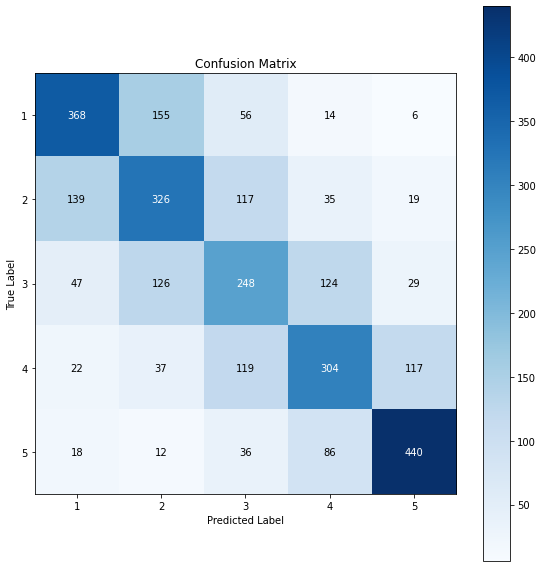

In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm, cmap=plt.cm.Blues)
ax.set_title('Confusion Matrix')
plt.colorbar(im)
tick_marks = np.arange(len(set(y_test)))
plt.xticks(tick_marks, sorted(set(y_test)))
plt.yticks(tick_marks, sorted(set(y_test)))

# Add text annotations inside the plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
fig.tight_layout()
plt.show()

In [183]:
asdasdadsads

NameError: ignored

In [ ]:
text = "This is a *sample* text with //some// special characters"
text = text.replace("*", "").replace("//", "")
print(text)


In [ ]:
def remove_website_links(text):
    return re.sub(r'\bhttps?://\S+', '', text)

In [ ]:
df['filtered_review_URL'] = df['filtered_review1'].apply(remove_website_links)

In [ ]:
#website_pattern = r'http[s]?://www.(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
website_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

# Define function to apply pattern to each string in column
def remove_website_links(text):
    return re.sub(website_pattern, '', text)

# Apply function to column using apply method
df['filtered_review_URL'] = df['filtered_review_URL'].apply(remove_website_links)


In [ ]:
df

In [ ]:
text = "//www.knoebels.com/teamrsvp says the page does not exist"

# Define regular expression pattern to match website links
#website_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
website_pattern = r'(https?://(?:[-\w./]|(?:%[\da-fA-F]{2}))+)' 

# Remove website links from text using sub() function
clean_text = re.sub(website_pattern, '', text)

print(clean_text)

In [ ]:
pip install urlextract

In [ ]:
# Define a regex pattern to match any type of URL
url_pattern = re.compile(r'(https?://|www\.)\S+')

# Remove URLs from the 'review_text' column using str.replace()
df['review_text_without_urls'] = df['filtered_review_URL'].str.replace(url_pattern, '')

In [ ]:
df.drop('review_text_without_urls', axis=1, inplace=True)

In [ ]:
df

In [ ]:
pip install vaderSentiment

In [ ]:
pip install emoji

In [ ]:
import emoji
from textblob import TextBlob

# Define a function to analyze the sentiment of text
def analyze_sentiment(text):
    # Replace emojis with their textual descriptions
    text = emoji.demojize(text)
    # Analyze the sentiment using TextBlob
    sentiment = TextBlob(text).sentiment.polarity
    # Return the sentiment score
    return sentiment

# Test the function with a string that contains emojis
text = "Atlanta airport so damn dirty n triflingðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­"
sentiment = analyze_sentiment(text)
print(sentiment)

In [ ]:
df

In [ ]:
import re

text = "Atlanta airport so damn dirty n triflingðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­"

# Define a dictionary of special characters and their corresponding Unicode emoji characters
emoji_dict = {"dirty": "\u1F922"}

# Iterate through the dictionary and replace each special character with its corresponding emoji
for special_char, emoji_char in emoji_dict.items():
    text = re.sub(special_char, emoji_char, text)

print(text)